<a href="https://colab.research.google.com/github/f-ssemwanga/data_science-sessions/blob/main/Data_Science_Session_101.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [39]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import OneHotEncoder #for converting categorical data into numeric


print("TensorFlow version", tf.__version__)



TensorFlow version 2.12.0


In [ ]:
scaler = tf.constant(7)
scaler.ndim #single dimention

0

In [ ]:
vector = tf.constant([5,5])
vector.ndim

1

In [ ]:
matrix = tf.constant([[1,2], [3,4]])
matrix.ndim

2

In [ ]:
tensor = tf.constant([[[1,2,3], [4,5,6]]])
tensor
tensor.ndim

3

In [ ]:
#tensor operations
#addition - used adding mean value when you have missing value - you use mean to compute and replace the missing values
addedTensor = tensor +10
addedTensor


<tf.Tensor: shape=(1, 2, 3), dtype=int32, numpy=
array([[[11, 12, 13],
        [14, 15, 16]]], dtype=int32)>

In [ ]:
#tensor subtration

subtractedTensor = tensor -7
subtractedTensor

<tf.Tensor: shape=(1, 2, 3), dtype=int32, numpy=
array([[[-6, -5, -4],
        [-3, -2, -1]]], dtype=int32)>

In [17]:
#average mean
x = np.ones((2,2)) 
y = np.zeros((2,2))
avg = tf.keras.layers.Average()([x,y])
avg.numpy().tolist()

[[0.5, 0.5], [0.5, 0.5]]

###Machine Learning and model building tasks

Text(0, 0.5, 'Labels')

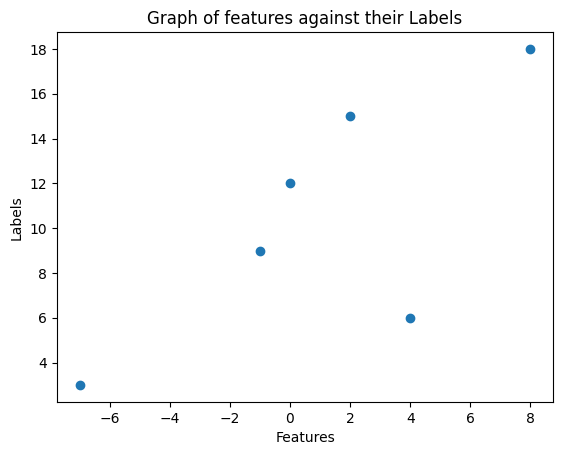

In [22]:
### Creating data to view and fit
#use the matplot lib library for visualisation

#####Creating Features ####
features = np.array([-7.0, 4.0, -1.0, 0, 2.0, 8.0])

###Creating labels - these must match the number of features ###
labels = np.array([3.0, 6.0, 9.0, 12.0, 15.0, 18.0 ])

##visualise
plt.scatter(features, labels)
plt.title("Graph of features against their Labels")
plt.xlabel("Features")
plt.ylabel("Labels")


In [59]:
###Creating a tensor for a house price prediction problem###
house_info = tf.constant(["bedroom", "bathroom", "kitchen", "garage"])
house_price = tf.constant([95000,250000,450000, 300000])
print("House Attributes: ", house_info)
print("House Prices: ", house_price)


House Attributes:  tf.Tensor([b'bedroom' b'bathroom' b'kitchen' b'garage'], shape=(4,), dtype=string)
House Prices:  tf.Tensor([ 95000 250000 450000 300000], shape=(4,), dtype=int32)


In [57]:
###use One-hot encoding to convert the categorical data into numeric data before fitting the model
#reshape the data using the array.reshape(-1,1)
house_info_reshaped = house_info.numpy().reshape(-1,1)

encoder = OneHotEncoder(sparse=False)
house_info_encoded = encoder.fit_transform(house_info_reshaped)


/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


In [61]:
###Steps in modelling  with tensor flow###

###1. Create the model with sequential API

model = tf.keras.Sequential([tf.keras.layers.Dense(1, activation =None)])
model
###2. Compile the model

model.compile (loss = tf.keras.losses.mae, 
               optimizer=tf.keras.optimizers.SGD(),
               metrics = ["mae"]
               )

###3.Fit the model, where epochs is the number of iteration
### model will have higher accuracy
model.fit(house_info_encoded, house_price, epochs=3)


Epoch 1/3
1/1 [==============================] - 1s 1s/step - loss: 273749.8750 - mae: 273749.8750
Epoch 2/3
1/1 [==============================] - 0s 12ms/step - loss: 273749.8438 - mae: 273749.8438
Epoch 3/3
1/1 [==============================] - 0s 12ms/step - loss: 273749.8125 - mae: 273749.8125


In [62]:
#4. prediction
# positive indicate good predictions and negative is bad predictions

model.predict(house_info_encoded)

1/1 [==============================] - 0s 80ms/step


array([[ 0.06101093],
       [-0.2950485 ],
       [ 0.690643  ],
       [ 0.2781634 ]], dtype=float32)